# Bank Customer Churn Prediction(Kaggle)

## 1. 문제 정의

고객의 은행 이탈 여부를 예측(binary classification)하는 문제.
1. 평가 척도는 ROC-AUC
2. 데이터 설명
- id: 인덱스
- Customer ID: 각 고객의 고유 식별번호
- Surname: 고객의 성
- Credit Score: 고객의 신용점수
- Geography: 고객이 거주하는 국가
- Gender: 고객의 성별
- Age: 고객의 나이
- Tenure: 고객이 은행을 이용한 기간
- Balance: 고객의 계좌 잔액
- NumOfProducts: 고객이 이용하는 은행 상품의 수
- HasCrCard: 신용카드 보유 여부  (1: 보유 중, 0: 미보유)
- IsActiveMember: 활성 회원 여부  (1: 활성화된 고객, 0: 비활성화된 고객)
- EstimatedSalary: 고객의 예상 연봉
- Exited: 고객 이탈 여부  (1: 이탈 고객, 0: 비이탈 고객)

## 2. 탐색적 데이터 분석(EDA)

In [1]:
# 필요 라이브러리 로드
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# 데이터 로드
bankchurn_df_org = pd.read_csv('./bank_churn_train.csv')
bankchurn_df = bankchurn_df_org.copy()
bankchurn_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [2]:
# 데이터프레임 확인
bankchurn_df.info()
print('\n 데이터 세트의 shape:', bankchurn_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB

 데이터 세트의 shape: (165034, 14)


In [3]:
print('전체 데이터의 기술통계량 \n', bankchurn_df.describe())

전체 데이터의 기술통계량 
                 id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.

In [4]:
# 불필요한 칼럼 삭제
bankchurn_df.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)
bankchurn_df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


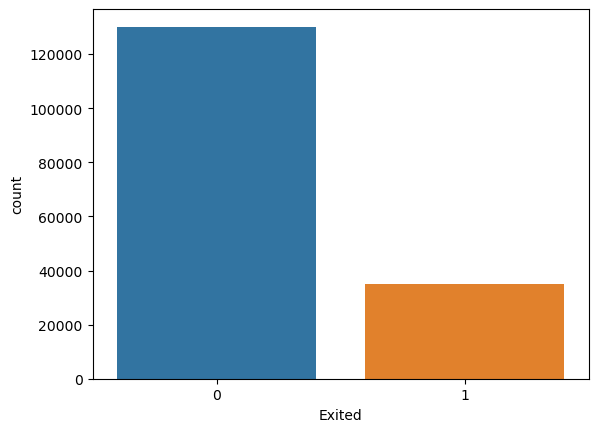

In [5]:
# 결측치 확인 - Null 값 없음
# 타겟값 분포도 확인 - 이탈 고객 비율이 적은 불균형 분포
sns.countplot(x='Exited', data=bankchurn_df)
plt.show()

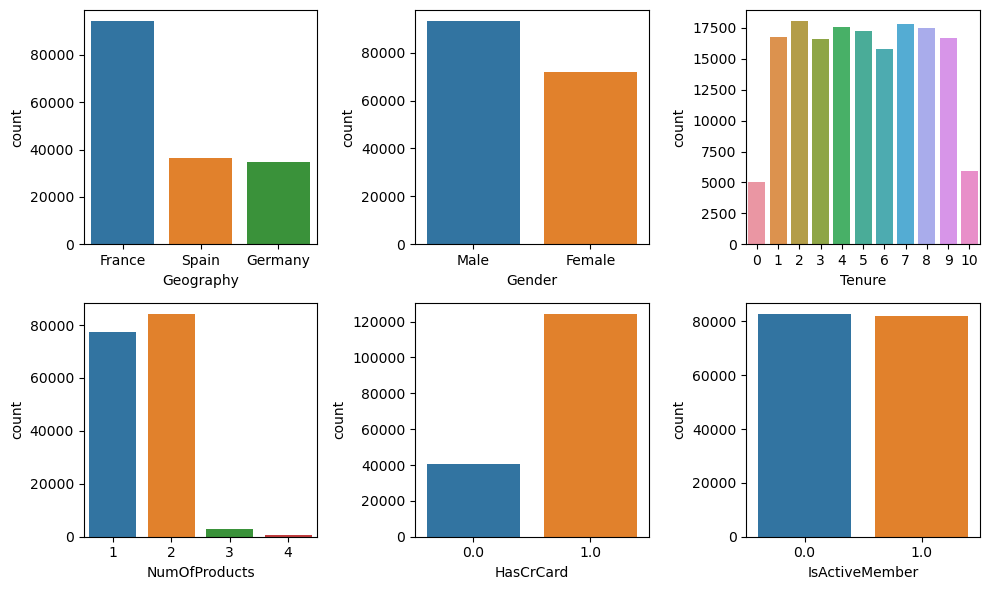

In [6]:
# 이산형 칼럼의 건수 시각화
cat_columns = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for index, column in enumerate(cat_columns):
    row = index // 3  # 행 인덱스 계산
    col = index % 3   # 열 인덱스 계산
    sns.countplot(x=column, data=bankchurn_df, ax=axs[row, col])

plt.tight_layout()
plt.show()

- IsActiveMember, Gender, Tenure는 거의 균일한 분포를 보임
- 데이터 셋 중에는 France 고객이 가장 많았으며, 대부분의 사람들은 1, 2개 정도의 은행 상품에 가입되어 있음

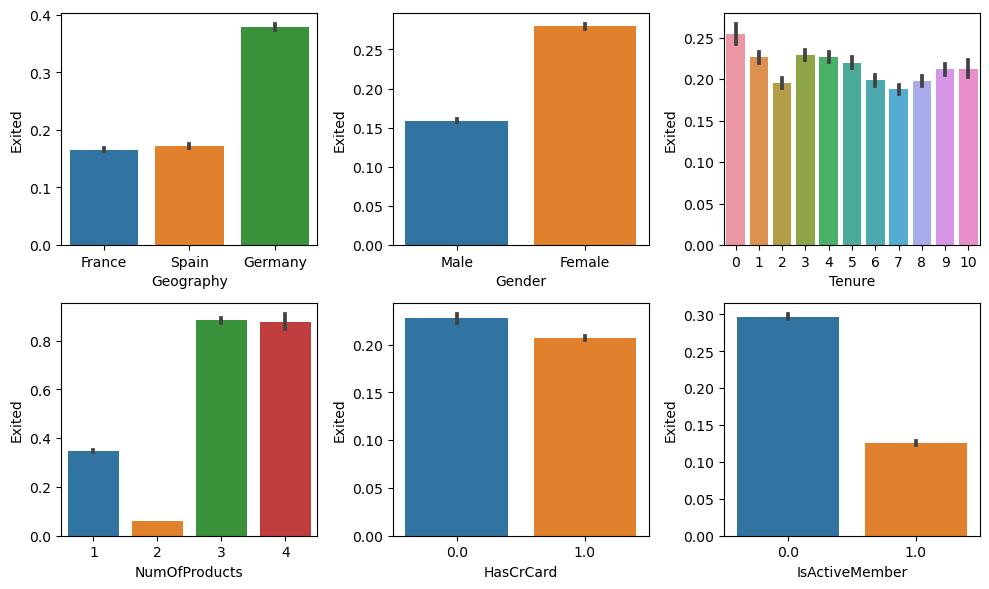

In [11]:
# 이산형 칼럼을 이탈 정도에 대하여 시각화
cat_columns = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for index, column in enumerate(cat_columns):
    row = index // 3 
    col = index % 3   
    sns.barplot(x=column, y='Exited', data=bankchurn_df, ax=axs[row, col])

plt.tight_layout()
plt.show()

- 이탈 비율이 가장 높은 지역은 Germany. 고객 수가 비슷한 Spain에 비해 이탈 비율이 상당히 높다.
- 이용하는 은행 상품이 많은 경우(3, 4개) 이탈 비율도 큼 - 하지만 적은 경우(1, 2개) 에 비해 인원 수가 압도적으로 적은 것을 고려해야 함.
- 은행 이용 기간 및 신용카드 유무와 은행 이탈 여부는 큰 관계가 없어보임.
- ActiveMember일 수록 이탈할 가능성이 낮음.

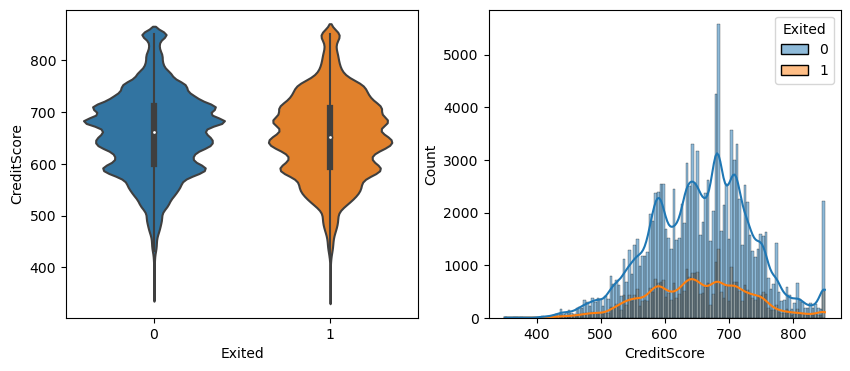

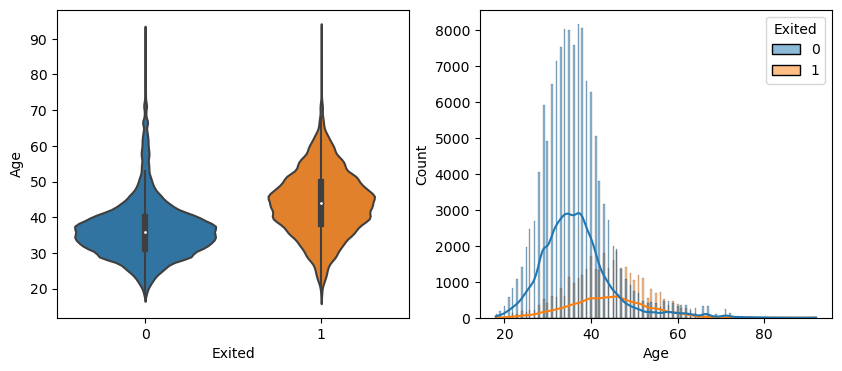

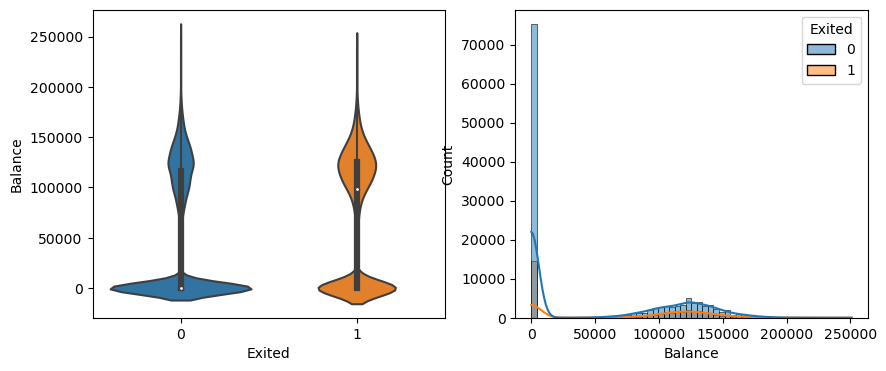

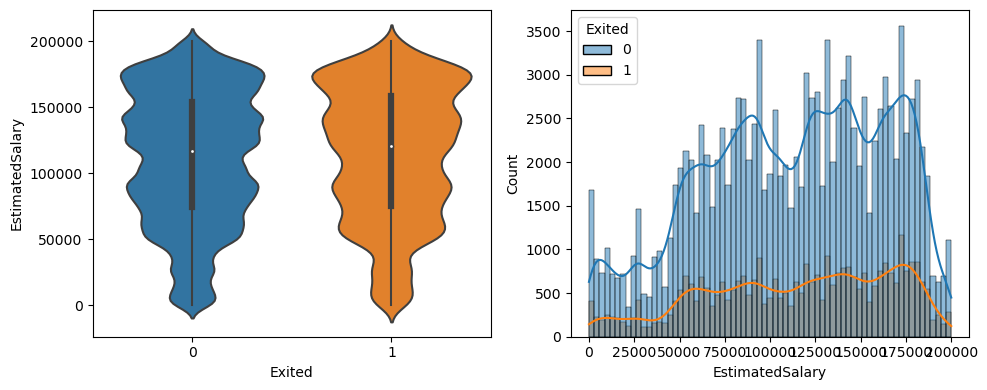

In [19]:
# 연속형 칼럼의 건수/ 시각화
cont_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

for column in cont_columns:
    # 왼쪽에는 바이올린 플롯, 오른쪽에는 히스토그램을 시각화    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    # Exited값 별 개별 칼럼의 바이올린 플롯
    sns.violinplot(x='Exited', y=column, data=bankchurn_df, ax=axs[0])
    # Exited 값에 따른 개별 칼럼의 히스토그램
    sns.histplot(x=column, data=bankchurn_df, kde=True, hue='Exited', ax=axs[1])

plt.tight_layout()
plt.show()

- 주 고객 나이대는 30초반 부터 40초반 이며, 이탈 비율은 40~50세 사이에서 가장 높음
- Balance는 0에 치우쳐진 분포를 보임

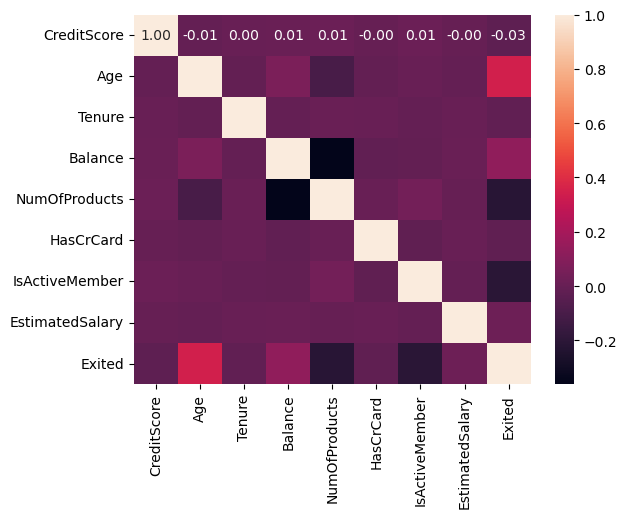

In [20]:
corr = bankchurn_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cbar=True)
plt.show()

In [21]:
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,-0.027383
Age,-0.008918,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,0.340768
Tenure,0.000942,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,-0.019565
Balance,0.006973,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,0.129743
NumOfProducts,0.011361,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,-0.214554
HasCrCard,-0.002828,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,-0.022141
IsActiveMember,0.014790,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,-0.210237
EstimatedSalary,-0.001820,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.018827
Exited,-0.027383,0.340768,-0.019565,0.129743,-0.214554,-0.022141,-0.210237,0.018827,1.000000


- 결정값인 Exited는 Age와 0.34, IsActiveMember 및 NumOfProducts와 -0.21의 상관계수를 가짐
- Balance와 NumOfProducts는 -0.36으로 서로 밀접한 관계가 있다, 그 외의 칼럼 간에는 서로 큰 영향을 주지 않을 것으로 관찰됨

### 추가 EDA 방향
1. 더 디테일한 인사이트 발굴
- 이번주는 전체적인 분포랑 Exited에 집중했는데, 생각보다 인사이트를 찾기 까다롭고 두루뭉실한 경향이 있어서 더 세부적이고 정량화할 수 있는 방법을 더 찾아봐야 할 것 같습니다
- 예를 들어, 뚜렷한 분포 차이가 있던 Age와 Geography는 어떨까: 이탈이 높은 나이 대 위주로
- Tenure, CreditScore, EstimatedSalary와 같이 꽤 분포가 골고루 있는 피처를 어떻게 더 분석할 수 있나
- 상관계수가 높은 피처들끼리 EDA 더 진행해보기
- 좀 더 한눈에 결과를 모아보기 편한 tool이 있으면 그걸 사용해 보는것도 좋을 거 같네요: 세션 발표에서 다른 조가 sweetviz를 사용하던데 그거를 사용해보던가 다른 걸 찾아보니 Pandas Profiling 라이브러리도 좋아보입니다!
2. https://velog.io/@tngus0325/%EA%B3%A0%EA%B0%9D-%EC%9D%B4%ED%83%88-%EC%98%88%EB%B0%A9%EC%9D%84-%EC%9C%84%ED%95%9C-%EC%9D%B4%ED%83%88-%EA%B3%A0%EA%B0%9D-%EB%B6%84%EC%84%9D-%EB%B0%8F-%EB%8C%80%EC%95%88%EC%B1%85-%EC%88%98%EB%A6%BD#%ED%95%B4%EA%B2%B0%EB%B0%A9%EC%95%88 처럼 EDA 이후 통계분석을 통해 '고객의 이탈을 막기위해 ~ 부분에 집중해서 ~한 대책이 필요하다' 와 같이 얻은 인사이트를 통해 문제해결에 이용하는 방향성도 괜찮은 것 같습니다(아무래도 EDA 스터디니까요)